# 0428

Related links

- [Course website](https://www-math.nsysu.edu.tw/~chlin/2025SMath599/2025SMath599.html)
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)

## Data

In [1]:
### load nsysu

import os
import urllib
import numpy as np

base = r"https://github.com/SageLabTW/auto-grading/raw/master/nsysu-digits/"
for c in ['X', 'y']:
    filename = "nsysu-digits-%s.csv"%c
    if filename not in os.listdir('.'):
        print(filename, 'not found --- will download')
        urllib.request.urlretrieve(base + c + ".csv", filename)

Xsys = np.genfromtxt('nsysu-digits-X.csv', dtype=int, delimiter=',') ### flattened already
ysys = np.genfromtxt('nsysu-digits-y.csv', dtype=int, delimiter=',')

In [2]:
# load MNIST (long)

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

[Sample DataFrame](https://docs.google.com/spreadsheets/d/1pzcuTVMyRhBrwmcpOnGILUjMsPeF8fjkSSLwUuevXJ0/edit?usp=sharing)

In [3]:
from sklearn import datasets
titanic = datasets.fetch_openml(name='titanic', version=1, as_frame=True)

In [4]:
# required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## [5. Machine Learning](https://jakevdp.github.io/PythonDataScienceHandbook/05.00-machine-learning.html)

- Machine learning is where these computational and algorithmic skills of data science meet the statistical thinking of data science.
- they must be approached with a firm grasp of the strengths and weaknesses of each method, as well as a grasp of general concepts such as bias and variance, overfitting and underfitting, and more.

Goal
- To introduce the fundamental vocabulary and concepts of machine learning.
- To introduce the Scikit-Learn API and show some examples of its use.
- To take a deeper dive into the details of several of the most important machine learning approaches, and develop an intuition into how they work and when and where they are applicable.


Traditional programming vs machine learning
- accuracy: usually zero-or-one vs trained to be better
- design: rule based by human vs pattern finding by machine
- hardware requirement: not much vs heavily
- mindset: exact algorihm vs approximation

Side note: [Computer Go](https://en.wikipedia.org/wiki/Computer_Go)

## [What Is Machine Learning?](https://jakevdp.github.io/PythonDataScienceHandbook/05.01-what-is-machine-learning.html)

building models of data

For example:
- data of head or tail --> probability of head of a coin --> generate new data
- data of (x,y) --> best fitting line --> predict y from x

With label or not --> discrete or continuous:

- supervised learning: given (x,y) and learn how to predict y
    - classification: learn how to recognize photos of cats and dogs
    - regression: learn how to estimate y from x
- unsupervised learning: given x and learn how to analyze x
    - clustering: put photos into several groups in a reasonable way
    - dimensionality reduction: finding good features from existing data

See textbook for more examples

Try on your own: [Real-World Examples of Machine Learning (ML)](https://www.tableau.com/learn/articles/machine-learning-examples)

## [Introducing Scikit-Learn](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html)

Scikit-Learn is characterized by a clean, uniform, and streamlined API, as well as by very useful and complete online documentation.

- data representation
- Estimator API

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
import sklearn
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
print(X.shape, y.shape)

(150, 4) (150,)


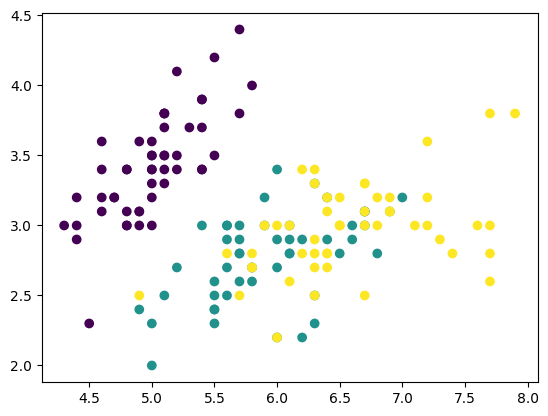

In [7]:
plt.scatter(X[:,0], X[:,1], c=y)

See textbook for more details

In [8]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X,y)

KNeighborsClassifier()

In [9]:
import numpy as np
y_new = model.predict(X)
print(np.sum(y==y_new))

145


In [10]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3) # 分群數
model.fit(X)


KMeans(n_clusters=3)

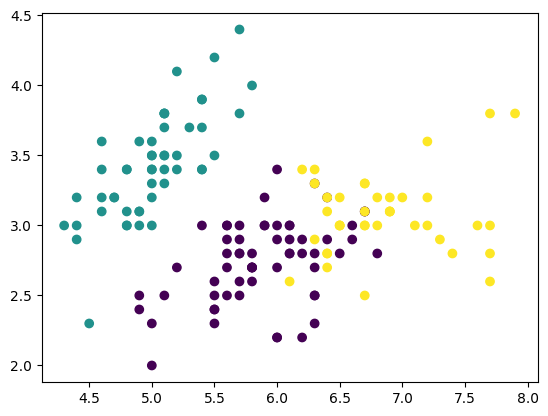

In [11]:
y_new = model.predict(X)
plt.scatter(X[:,0], X[:,1], c=y_new)

In [12]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X,y)
y_new = model.predict(X)
print(np.sum(y==y_new))


150


## [Hyperparameters and Model Validation](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html)

In principle, model validation is very simple: after choosing a model and its hyperparameters, we can estimate how effective it is by applying it to some of the training data and comparing the prediction to the known value.

- Training set
- Validation set
- Testing set

Cross validation

In [42]:
from sklearn.model_selection import train_test_split
x = np.arange(10)
y = list("abcdefghij")
x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size=0.5)

In [44]:
import sklearn
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test  = train_test_split(X, y)
print(X_train.shape, X_test.shape)

(112, 4) (38, 4)


In [47]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_new = model.predict(X_test)
print(np.sum(y_test==y_new))

37


In [48]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y)

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

[bias-variance tradeoff](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff)

- bias 與現有資料的誤差
- variance 與理想答案的誤差

See textbook for more details

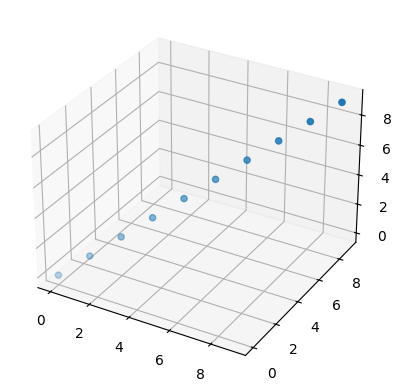

In [13]:
%matplotlib inline

fig = plt.figure()
ax = plt.axes(projection='3d')
x = np.arange(10)
ax.scatter(x, x, x)

In [14]:
%matplotlib notebook

fig = plt.figure()
ax = plt.axes(projection='3d')
x = np.arange(10)
ax.scatter(x, x, x)

<IPython.core.display.Javascript object>

Read the textbook if you are interested in spatial statistics.

In [15]:
import seaborn as sns
sns.__version__

'0.13.2'

In [16]:
print(np.linalg.eigvalsh([[0, 2], [2, 2]]))
data = np.random.multivariate_normal([0, 0], [[0, 2], [2, 2]], size=2000)

[-1.23606798  3.23606798]


C:\Users\User\AppData\Local\Temp\ipykernel_3620\1025794728.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data = np.random.multivariate_normal([0, 0], [[0, 2], [2, 2]], size=2000)


In [17]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])
data.head()

,x,y
0,-0.525366,-0.334824
1,0.557111,0.075016
2,2.858531,2.522350
3,-3.133429,-4.192594
4,1.439687,1.024499


In [18]:
sns.histplot(data.x)

<IPython.core.display.Javascript object>

<Axes: xlabel='x', ylabel='Count'>

In [19]:
# kernel density estimatation
sns.kdeplot(data.x, fill=True)

<IPython.core.display.Javascript object>

<Axes: xlabel='x', ylabel='Density'>

In [20]:
plt.hist2d(data.x, data.y, cmap="Greys", bins=50)

<IPython.core.display.Javascript object>

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], shape=(50, 50)),
 array([-6.80192412, -6.5314792 , -6.26103429, -5.99058937, -5.72014446,
        -5.44969954, -5.17925463, -4.90880971, -4.6383648 , -4.36791988,
        -4.09747497, -3.82703005, -3.55658513, -3.28614022, -3.0156953 ,
        -2.74525039, -2.47480547, -2.20436056, -1.93391564, -1.66347073,
        -1.39302581, -1.1225809 , -0.85213598, -0.58169107, -0.31124615,
        -0.04080124,  0.22964368,  0.50008859,  0.77053351,  1.04097843,
         1.31142334,  1.58186826,  1.85231317,  2.12275809,  2.393203  ,
         2.66364792,  2.93409283,  3.20453775,  3.47498266,  3.74542758,
         4.01587249,  4.28631741,  4.55676232,  4.82720724,  5.09765215,
         5.36809707,  5.63854199,  5.9089869 ,  6.17943182,  6.44987673,
     

In [21]:
sns.kdeplot(data, x='x', y='y', fill=True)

<IPython.core.display.Javascript object>

<Axes: xlabel='x', ylabel='y'>

In [22]:
# sns.jointplot(data, x='x', y='y')
sns.jointplot(data, x='x', y='y', kind='kde', fill=True)

<IPython.core.display.Javascript object>

In [23]:
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True, as_frame=True)
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [24]:
iris = X.copy()
iris["species"] = y
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
sns.pairplot(iris, hue="species")

<IPython.core.display.Javascript object>

Yet more in the textbook.

Also consider [Plotly](https://plotly.com/) for interactive plots.

In [26]:
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True, as_frame=True)
print(X.shape)
print(y.shape)
iris = X.copy()
iris["species"] = y
iris.head()

(150, 4)
(150,)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

In [ ]:
px.scatter(iris, 
           x="petal length (cm)", 
           y="petal width (cm)", 
           color="species", 
           hover_data=["sepal length (cm)","sepal width (cm)"])

How to share?  

- save picture
- save HTML
- [Streamlit](https://streamlit.io/) or other dashboarding tools.

## Homework

- Type your answers here and submit your answer in `*.ipynb` format.
- You may use code cell and Markdown cell.

In [28]:
NAME = "李瑋宸" # change to your name
STD_ID = "B123245008" # change to your student ID
print("My name is %s and my student ID is %s."%(NAME, STD_ID))

My name is 李瑋宸 and my student ID is B123245008.


### 1. Machine Learning Categories
- Briefly explain the difference between supervised and unsupervised.
- Give one real-world example of each.

In [80]:
#  supervised learning: given (x,y) and learn how to predict y
#      classification: learn how to recognize photos of cats and dogs ==>EXAMPLE: Task of automated spam detection for emails
#      regression: learn how to estimate y from x ==>EXAMPLE: Task of computing the distance to galaxies observed through a telescope
#  unsupervised learning: given x and learn how to analyze x
#      clustering: put photos into several groups in a reasonable way ==>EXAMPLE: Analyze user connections and interactions to identify clusters of friends or interest groups, enabling targeted friend or content recommendations. 
#      dimensionality reduction: finding good features from existing data ==>EXAMPLE: face recognition

### 2. Choose the Right Problem Type
- Classify the following scenarios into regression, classification, or clustering problems:
  - Predicting the price of a house.
  - Grouping customers based on purchasing behavior.
  - Identifying whether an email is spam or not.

In [81]:
# Predicting the price of a house. ==>regression
# Grouping customers based on purchasing behavior. ==>clustering
# Identifying whether an email is spam or not. ==>classification

### 3. First Steps with Scikit-Learn
- Load the `iris` dataset using Scikit-Learn.
- Display the shape of the data and target arrays.
- Print the first 5 samples.

In [82]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
print(X.shape,y.shape)
print(X[0:5,0:4])


(150, 4) (150,)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


### 4. Train a Simple Classifier
- Split the `iris` dataset into training and testing sets.
- Train a `KNeighborsClassifier` on the training set.
- Evaluate the accuracy on the testing set.

In [83]:
from sklearn.datasets  import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
iris = load_iris()
x = iris.data
y = iris.target
x_train, x_test, y_train, y_test  = train_test_split(x, y)
model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_new = model.predict(x_test)
print(accuracy_score(y_test, y_new)) 




1.0


### 5. Explore Model Hyperparameters
- Use a `KNeighborsClassifier` with `n_neighbors=1`, `5`, and `10`.
- Compare the testing accuracy for each value.
- Which value gives the best result?

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
x = iris.data
y = iris.target
x_train, x_test, y_train, y_test  = train_test_split(x, y)
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train, y_train)
y_new = model.predict(x_test)
d={1:accuracy_score(y_test, y_new)}
print("n_neighbors=1 ",accuracy_score(y_test, y_new))
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
y_new = model.predict(x_test)
d[5] = accuracy_score(y_test, y_new)
print("n_neighbors=5 ",accuracy_score(y_test, y_new))
model = KNeighborsClassifier(n_neighbors=10)
model.fit(x_train, y_train)
y_new = model.predict(x_test)
d[10] = accuracy_score(y_test, y_new)
print("n_neighbors=10 ",accuracy_score(y_test, y_new))

print(d)
print("Max:",[i for i,j in d.items() if j == max(d.values())])


n_neighbors=1  0.8947368421052632
n_neighbors=5  0.9473684210526315
n_neighbors=10  1.0
{1: 0.8947368421052632, 5: 0.9473684210526315, 10: 1.0}
Max: [10]


### 6. Create a Validation Curve
- For `KNeighborsClassifier`, plot the training and validation score as a function of `n_neighbors` using `validation_curve`.
- What do you observe about underfitting and overfitting?

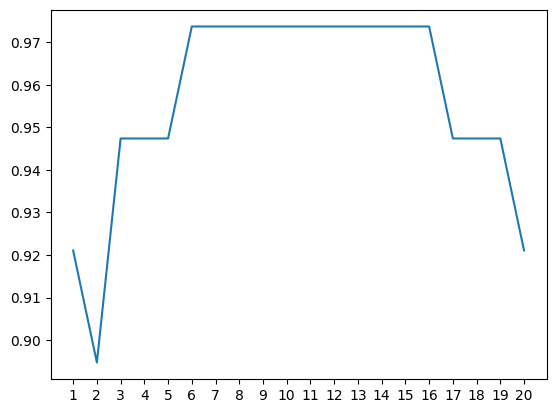

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
x = iris.data
y = iris.target
x_train, x_test, y_train, y_test  = train_test_split(x, y)

arr_score = []
for i in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    y_new = model.predict(x_test)
    arr_score += [accuracy_score(y_test, y_new)]

arr_n_neighbors = np.array([i for i in range(1, 21)])
arr_score = np.array(arr_score)    
# print(arr_n_neighbors, arr_score,"\n")
plt.plot(arr_n_neighbors, arr_score)
plt.xticks(arr_n_neighbors)
plt.show()


### 7. Implement Cross-Validation
- Perform 5-fold cross-validation on the `iris` dataset using `cross_val_score` with `KNeighborsClassifier`.
- Report the mean and standard deviation of the cross-validation scores.

In [86]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold,cross_val_score
import numpy as np

iris = load_iris()
x = iris.data
y = iris.target
model = KNeighborsClassifier()
#kf = KFold(n_splits=5)
scores = cross_val_score(model,x,y,cv=5)
print(scores.mean(),scores.std())



0.9733333333333334 0.02494438257849294


### 8. Evaluate a Regression Model
- Load the `Boston` housing dataset (or another regression dataset if `Boston` is unavailable).
- Split it into training and testing sets.
- Train a `LinearRegression` model and report the Mean Squared Error (MSE) on the testing set.

In [87]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

california = fetch_california_housing()
x = california.data
y = california.target
x_train, x_test, y_train, y_test = train_test_split(x, y)
model = LinearRegression()
model.fit(x_train, y_train)
y_new = model.predict(x_test)
print((1/len(y_test))*np.sum((y_test-y_new)**2))
print(mean_squared_error(y_test, y_new))



0.5347380579103264
0.5347380579103264


### 9. Compare Different Classifiers
- Train both a `KNeighborsClassifier` and a `DecisionTreeClassifier` on the same training set (e.g., the `iris` dataset), using the default hyperparameter.
- Evaluate and compare their accuracy on the testing set.
- Discuss which model performed better and why.

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
x = iris.data
y = iris.target
model1 = KNeighborsClassifier()
model2 = DecisionTreeClassifier()
x_train, x_test, y_train, y_test = train_test_split(x, y)
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)
y_new1 = model1.predict(x_test)
y_new2 = model2.predict(x_test)

print("KNeighborsClassifier",np.sum(y_test==y_new1))
print("DecisionTreeClassifier",np.sum(y_test==y_new2))
if(np.sum(y_test==y_new1) > np.sum(y_test==y_new2)):
    print("KNeighborsClassifier is better")
elif(np.sum(y_test==y_new1) < np.sum(y_test==y_new2)):
    print("DecisionTreeClassifier is better")
else:
    print("Both are the same")



KNeighborsClassifier 36
DecisionTreeClassifier 35
KNeighborsClassifier is better


### 10. Model Selection with Cross-Validation
- Use cross-validation (`cross_val_score`) to evaluate the performance of both a `KNeighborsClassifier` and a `DecisionTreeClassifier`.
- Report the mean cross-validation score for each model.
- Based on the results, which model would you choose for this task and why?

In [89]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold,cross_val_score

iris = load_iris()
x = iris.data
y = iris.target
model1 = KNeighborsClassifier()
model2 = DecisionTreeClassifier()
#kf = KFold(n_splits=5)
scores1 = cross_val_score(model1,x,y)
scores2 = cross_val_score(model2,x,y)
print("KNeighborsClassifier",scores1.mean(),scores1.std())
print("DecisionTreeClassifier",scores2.mean(),scores2.std())
if(scores1.mean() > scores2.mean()):
    print("KNeighborsClassifier is better")
elif(scores1.mean() < scores2.mean()):
    print("DecisionTreeClassifier is better")
else:
    print("Both are the same")

KNeighborsClassifier 0.9733333333333334 0.02494438257849294
DecisionTreeClassifier 0.9600000000000002 0.03265986323710903
KNeighborsClassifier is better
